<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/02_02_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 02_01의 훈련세트와 테스트세트를 나누어 평가를 진행해 본 결과 문제가 발생한다.
# 길이가 25cm, 무게가 150g이면 사람이 판단했을때는 도미인데, AI는 빙어로 결론!
# 이 원인을 찾아보고 개선을 해보자.

# 도미(35개)와 빙어(14개) 데이터 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# for zip 에서 넘파이 기능 사용
import numpy as np
np.column_stack(([1,2,3],[4,5,6]))  # .column(열) stack(쌓는다)
#                 깅이용, 무게용 -> 변환

array([[1, 4],
       [2, 5],
       [3, 6]])

In [49]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:])

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))   # concatenate() 첫번째 차원을 따라 배열을 연결
print(fish_target)                                          # 1차원배열 (1이 35개:도미, 0이 14개:빙어)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
# https://wikidocs.net/193722
# stratify : 타겟값을 넣어줌 (target의 class 비율을 유지한채 데이터셋을 split함)
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


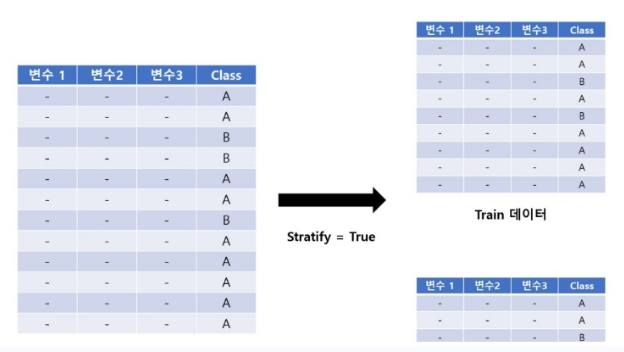

In [11]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [13]:
print(train_target)

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [15]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
from sklearn.neighbors import KNeighborsClassifier # K-이웃 근접 알고리즘

kn = KNeighborsClassifier() # 객체 생성
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [19]:
kn.score(test_input, test_target) # 평가시작! (테스트 입력, 테스트 정답)

1.0

In [20]:
print(kn.predict([[25, 150]]))    # 여기서도 마찬가지로 0:빙어로 나옴

[0.]


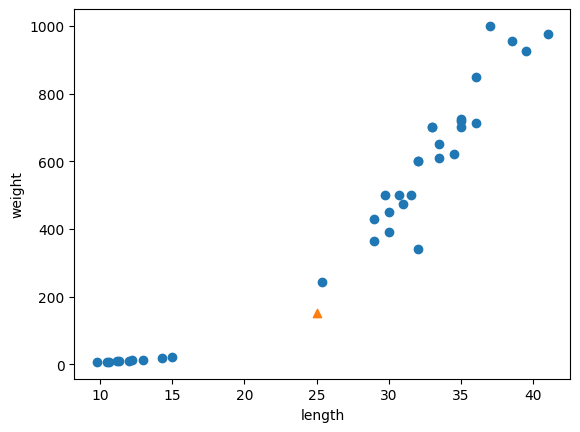

In [21]:
# 그래프로 확인해보자

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
# 마커 종류 변경 https://pyvisuall.tistory.com/39
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

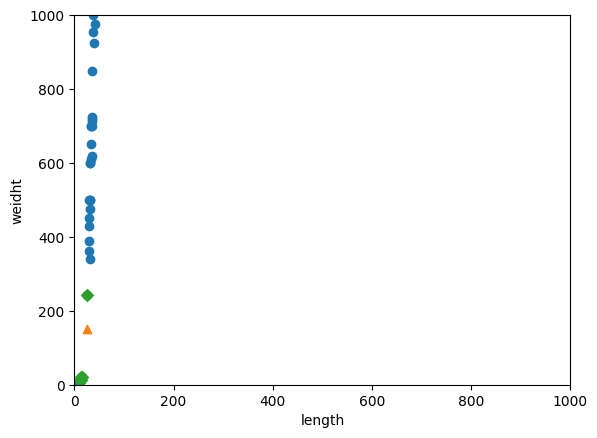

In [31]:
# x, y축에 비율이 다르기에 정확한 그래프로 판단할 수 없다.
# k-최근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 좀더 알아볼 필요가 있다.

distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') # 이웃에 값
plt.xlim((0,1000))
plt.ylim((0,1000))
plt.xlabel('length')
plt.ylabel('weidht')
plt.show()
# 축의 값범위에 위험성을 알고 가자!

In [28]:
print(train_input[indexes]) # k-최근접 알고리즘에 근접한 5개의 값 (도미1, 빙어4)
# [[[ 25.4 242. ] -> 도미
#   [ 15.   19.9] -> 빙어
#   [ 14.3  19.7] -> 빙어
#   [ 13.   12.2] -> 빙어
#   [ 12.2  12.2] -> 빙어 ]] -> 그래서 0으로 결과가 나왔음.

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [29]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [30]:
print(distances)  # 이웃간의 거리 출력

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [32]:
# 두 특성(길이, 무게)의 값이 놓인 범위가 매우 다름 -> 두 특성의 스케일이 다르다고 함
# 특성간의 스케일이 다른 일은 흔히 발생한다. 결론. 스케일을 맞춰야함.
# 특성값을 일정한 기준으로 맞춰주어야 한다. (데이터 전처리라고 함)

# 평균 구해보기 ( 가장 널리 사용되는 전처리 : 표준점수, z점수라고함)
# 표준 점수는 각 특성값이 평균에서 표준편차으 몇배만큼 떨어져 있는지를 나타냄
# 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구함
# 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
# 표준 점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값

mean = np.mean(train_input, axis=0)   # 평균, axis : 중심선
std = np.std(train_input, axis=0)     # 표준 편차
# tain_input -> 36개의 요소와 2개의 특성을 가짐 936,2) 크기의 배열임
# 행을 따라 각 열의 통계 값을 계산함
print(mean, std)
#[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
#  길이에 평균 무게의 평균      길이에 편차, 무게의 편차

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


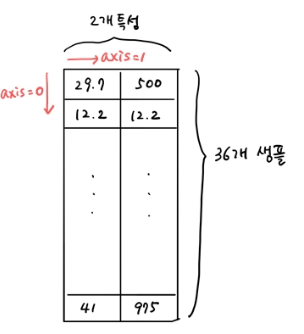

In [34]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준 점수를 변환
train_scaled = (train_input - mean) / std   # 표준점수 공식(암기)


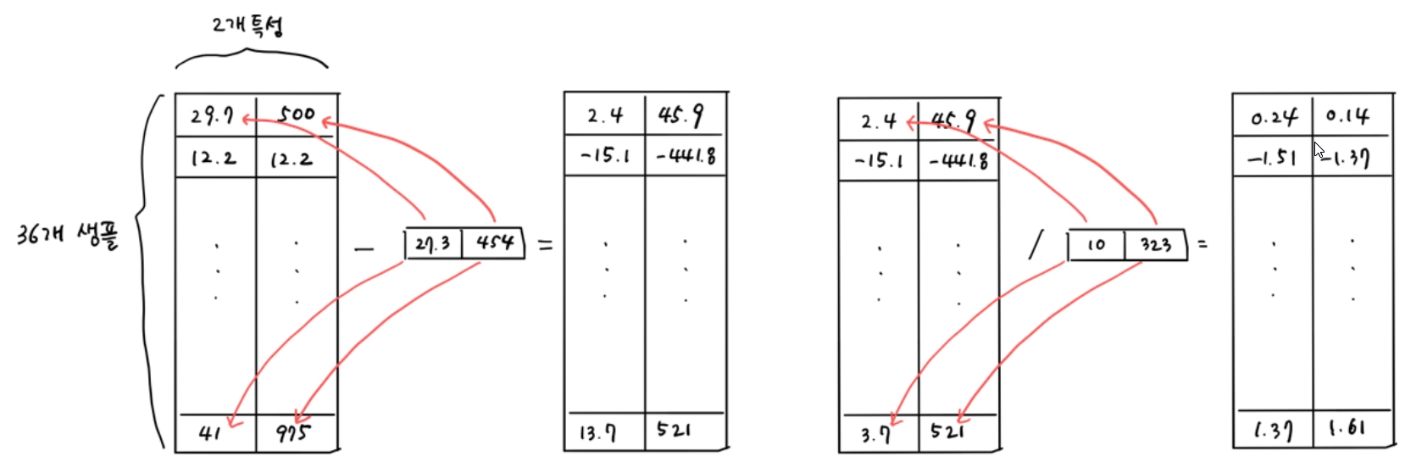

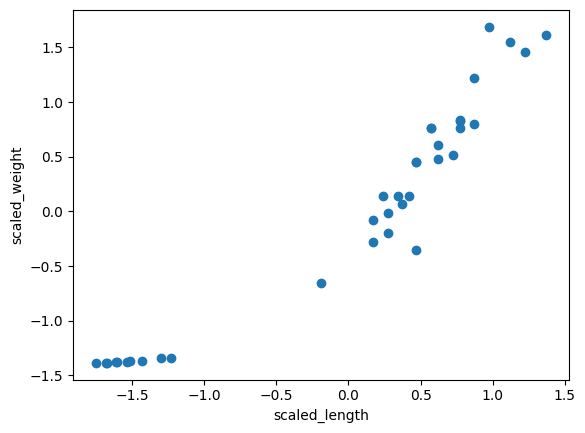

In [36]:

# 위 공식대로 저용하면 41의 길이와 975의 무게의 스케일이 1.37, 1.61로 표준화됨
# 전처리 데이터를 이용해서 모델 훈련 시키기

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.xlabel('scaled_length')
plt.ylabel('scaled_weight')
plt.show()
# 차트의 범위가 x축은 -2.0 ~ 1.4, y축은 -1.5 ~1.5 사이로 비슷해진다. (스케일 조정 성공)
# 전에 만들었던 표준점수 이전 차트랑 비교하면 비슷한 차트가 보인다.

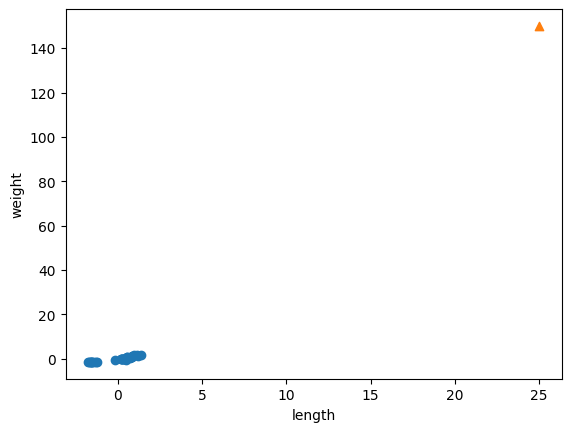

In [38]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 알고자 하는 값은 표준 점수화가 않됨
# 훈련세트를 평균으로 빼고 표준편차로 나누어 주었기 때문에 값의 범위가 달라짐 (훈견할꺼, 평가할꺼, 보고싶은거)

표준점수로 변환된 25, 150 : [-0.23012627 -0.94060693]


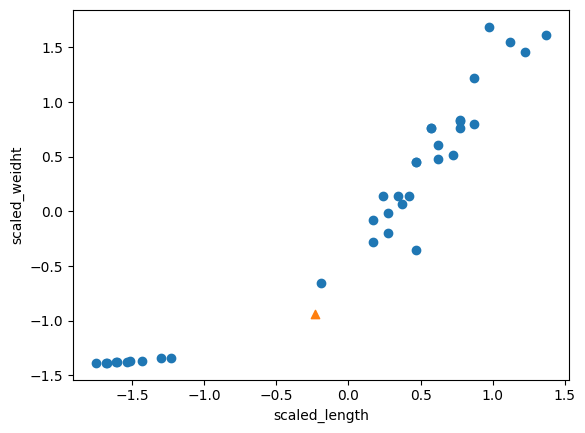

In [40]:
# 동일한 기준으로 샘플 변환하고 출력
new = ([25,150]-mean) / std
print(f"표준점수로 변환된 25, 150 : {new}")

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('scaled_length')
plt.ylabel('scaled_weidht')
plt.show()

In [41]:
# 훈련 시작!!!
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [42]:
test_scaled = (test_input - mean) / std   #표준 점수화

In [46]:
kn.score(test_scaled, test_target)    # 평가 진행

new = ([25,150]-mean) / std
print(kn.predict([new]))      # 25, 150짜리 결과를 보면

[1.]


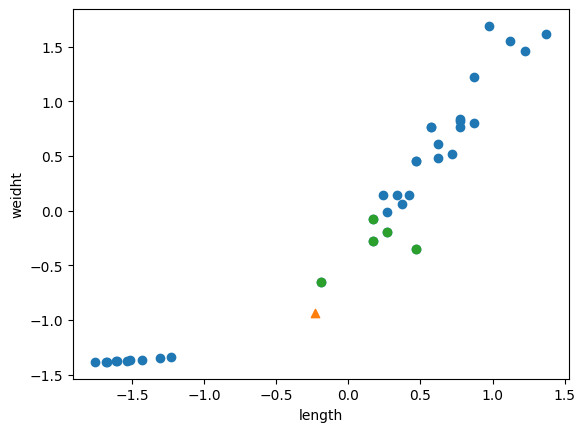

In [48]:
# kneighbors()로 최근접 이웃을 구한 다음 산정도를 그려봄
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1])
plt.xlabel('length')
plt.ylabel('weidht')
plt.show()